In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
iphone_data = pd.read_csv(r"E:\iphone_4s.csv")
iphone_data

,Unnamed: 0,reviews
0,0,Today i installed IOS on my iphone 4s 8GB.The ...
1,1,hello friend ..flipkart delivery is on data bu...
2,2,Always wanted to buy iphone 4s; because of its...
3,3,'Some' Features ( There is a lot more which yo...
4,4,i got faulty product.. very bad .. showing 10....
...,...,...
17355,17490,Is it really meaningful to buy 4s now. \n \n ...
17356,17491,"how to start using intrnet on i phone 4, its s..."
17357,17492,It is a very good fone.i just love it
17358,17493,"chooga, 20 Jan 2013\nI cannot open my applicat..."


In [3]:
iphone_data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [4]:
iphone_data

,reviews
0,Today i installed IOS on my iphone 4s 8GB.The ...
1,hello friend ..flipkart delivery is on data bu...
2,Always wanted to buy iphone 4s; because of its...
3,'Some' Features ( There is a lot more which yo...
4,i got faulty product.. very bad .. showing 10....
...,...
17355,Is it really meaningful to buy 4s now. \n \n ...
17356,"how to start using intrnet on i phone 4, its s..."
17357,It is a very good fone.i just love it
17358,"chooga, 20 Jan 2013\nI cannot open my applicat..."


In [5]:
iphone_data.shape

(17360, 1)

In [6]:
# to check whether any null values are there are not
iphone_data.isna().sum() 

reviews    0
dtype: int64

In [7]:
iphone_Data = iphone_data.dropna()

In [8]:
iphone_Data.shape

(17360, 1)

In [9]:
iphone_Data.describe()

,reviews
count,17360
unique,17360
top,Today i installed IOS on my iphone 4s 8GB.The ...
freq,1


In [10]:
iphone_Data[iphone_Data.duplicated()].shape    # check whether any null values or not

(0, 1)

In [11]:
iphone_Data.drop_duplicates(inplace = True)

In [12]:
iphone_Data.shape

(17360, 1)

In [13]:
iphone_Data.dtypes

reviews    object
dtype: object

# NLP-NATURAL LANGUAGE PROCESSING PIPELINE

## 1. Removing Stopwords,Punctuations,URL's,emojis

In [14]:
from nltk.stem import PorterStemmer,WordNetLemmatizer


In [15]:
def number_to_text(data):
    temp_str = data.split()
    string = []
    for i in temp_str:

    # if the word is digit, converted to
    # word else the sequence continues

        if i.isdigit():
            temp = inflect.engine().number_to_words(i)
            string.append(temp)
        else:
            string.append(i)
    outputStr = " ".join(string)
    return outputStr

In [16]:
ps = PorterStemmer()
def stem_text(data):
    tokens = word_tokenize(data)
    stemmed_tokens = [ps.stem(word) for word in tokens if word not in (stop_words)]
    return " ".join(stemmed_tokens)

In [17]:
lemma = WordNetLemmatizer()
def lemmatiz_text(data):    
    tokens = word_tokenize(data)
    lemma_tokens = [lemma.lemmatize(word, pos='v') for word in tokens if word not in (stop_words)]
    return " ".join(lemma_tokens)

In [18]:
def cleantext(text):
    text = re.sub(r'[^\w\s]', " ", text) # Remove punctuations
    text = re.sub(r"https?:\/\/\S+", ",", text) # Remove The Hyper Lin
    text = contractions.fix(text) # remove contractions 
    text = number_to_text(text) # convert numbers to text    
    text = text.lower() # convert to lower case
    
    # don't feel it's worth to use stemming as it may lead to some wrong words
    
    text = lemmatiz_text(text) # lemmatization
    
    return text

In [19]:
import re
import contractions
import inflect
from wordcloud import WordCloud
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words('english') # remove stop words

iphone_Data['cleaned_reviews']=iphone_Data['reviews'].apply(cleantext)
iphone_Data

,reviews,cleaned_reviews
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...
...,...,...
17355,Is it really meaningful to buy 4s now. \n \n ...,really meaningful buy 4s coz hard earn money c...
17356,"how to start using intrnet on i phone 4, its s...",start use intrnet phone four say mannual set r...
17357,It is a very good fone.i just love it,good fone love
17358,"chooga, 20 Jan 2013\nI cannot open my applicat...",chooga twenty jan two thousand thirteen open a...


In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopwords_set = set(stop_words)
cleaned_reviews = []

for index, row in iphone_Data.iterrows():
    
    # filerting out all the stopwords
    
    words_without_stopwords = [word for word in row.cleaned_reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # creating tweets list of tuples containing stopwords(list) and sentimentType
    
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
iphone_Data['cleaned_reviews'] = cleaned_reviews
iphone_Data.head(20)

,reviews,cleaned_reviews
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...
5,"within 15days , charger is not working, as per...",within 15days charger work per flipkart custom...
6,"After years of torture using Android, symbian ...",years torture use android symbian windows phon...
7,FOR THOSE WHO ARE COMPLAINING.nn1.Never compar...,complain nn1 never compare ghz core ram androi...
8,guys trust me don't buy any of the product fro...,guy trust buy product flipkart one ten product...
9,This is my first iphone and I am using it for ...,first iphone use past ten days quiet happy npr...


In [23]:
# removing the accents

from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

iphone_Data["cleaned_reviews"] = iphone_Data["cleaned_reviews"].apply(remove_accent)
iphone_Data.head(20)

,reviews,cleaned_reviews
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...
5,"within 15days , charger is not working, as per...",within 15days charger work per flipkart custom...
6,"After years of torture using Android, symbian ...",years torture use android symbian windows phon...
7,FOR THOSE WHO ARE COMPLAINING.nn1.Never compar...,complain nn1 never compare ghz core ram androi...
8,guys trust me don't buy any of the product fro...,guy trust buy product flipkart one ten product...
9,This is my first iphone and I am using it for ...,first iphone use past ten days quiet happy npr...


In [24]:
# removing empty text spaces

iphone_Data=iphone_Data[iphone_Data['cleaned_reviews']!='']
iphone_Data

,reviews,cleaned_reviews
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...
...,...,...
17355,Is it really meaningful to buy 4s now. \n \n ...,really meaningful buy 4s coz hard earn money c...
17356,"how to start using intrnet on i phone 4, its s...",start use intrnet phone four say mannual set r...
17357,It is a very good fone.i just love it,good fone love
17358,"chooga, 20 Jan 2013\nI cannot open my applicat...",chooga twenty jan two thousand thirteen open a...


In [25]:
# removing hyperlinks
cleaned_reviews= []

for index,row in iphone_Data.iterrows():
    
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.cleaned_reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

iphone_Data['cleaned_reviews'] = cleaned_reviews
iphone_Data.head(20)

,reviews,cleaned_reviews
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...
5,"within 15days , charger is not working, as per...",within 15days charger work per flipkart custom...
6,"After years of torture using Android, symbian ...",years torture use android symbian windows phon...
7,FOR THOSE WHO ARE COMPLAINING.nn1.Never compar...,complain nn1 never compare ghz core ram androi...
8,guys trust me don't buy any of the product fro...,guy trust buy product flipkart one ten product...
9,This is my first iphone and I am using it for ...,first iphone use past ten days quiet happy npr...


## 2. Tokenization 

In [26]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
iphone_Data['Tokens'] = iphone_Data.apply(lambda row: nltk.word_tokenize(row['cleaned_reviews']), axis=1)
iphone_Data.head(10)

,reviews,cleaned_reviews,Tokens
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no..."
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,..."
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g..."
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user..."
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m..."
5,"within 15days , charger is not working, as per...",within 15days charger work per flipkart custom...,"[within, 15days, charger, work, per, flipkart,..."
6,"After years of torture using Android, symbian ...",years torture use android symbian windows phon...,"[years, torture, use, android, symbian, window..."
7,FOR THOSE WHO ARE COMPLAINING.nn1.Never compar...,complain nn1 never compare ghz core ram androi...,"[complain, nn1, never, compare, ghz, core, ram..."
8,guys trust me don't buy any of the product fro...,guy trust buy product flipkart one ten product...,"[guy, trust, buy, product, flipkart, one, ten,..."
9,This is my first iphone and I am using it for ...,first iphone use past ten days quiet happy npr...,"[first, iphone, use, past, ten, days, quiet, h..."


## 3.Parts of Speech(POS) Labelling

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
pos_dict = {'J' :wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN,'R':wordnet.ADV}

In [31]:
def tokens_pos(text):
    tags = pos_tag(text)
    newlist=[]
    for word,tag in tags:
        newlist.append(tuple([word,pos_dict.get(tag[0])]))
    return newlist

In [32]:
iphone_Data['POS_Tagging'] = iphone_Data['Tokens'].apply(tokens_pos)
iphone_Data.head(20)

,reviews,cleaned_reviews,Tokens,POS_Tagging
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v..."
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli..."
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)..."
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,..."
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)..."
5,"within 15days , charger is not working, as per...",within 15days charger work per flipkart custom...,"[within, 15days, charger, work, per, flipkart,...","[(within, None), (15days, None), (charger, n),..."
6,"After years of torture using Android, symbian ...",years torture use android symbian windows phon...,"[years, torture, use, android, symbian, window...","[(years, n), (torture, n), (use, n), (android,..."
7,FOR THOSE WHO ARE COMPLAINING.nn1.Never compar...,complain nn1 never compare ghz core ram androi...,"[complain, nn1, never, compare, ghz, core, ram...","[(complain, n), (nn1, a), (never, r), (compare..."
8,guys trust me don't buy any of the product fro...,guy trust buy product flipkart one ten product...,"[guy, trust, buy, product, flipkart, one, ten,...","[(guy, n), (trust, n), (buy, v), (product, n),..."
9,This is my first iphone and I am using it for ...,first iphone use past ten days quiet happy npr...,"[first, iphone, use, past, ten, days, quiet, h...","[(first, r), (iphone, n), (use, n), (past, a),..."


## 4.Lemmatization

In [33]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew=" "
    for word,pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = word_lemmatizer.lemmatize(word,pos=pos)
            lemma_rew= lemma_rew + " "+ lemma
    return lemma_rew

In [34]:
iphone_Data['Lemmas'] = iphone_Data['POS_Tagging'].apply(lemmatize)
iphone_Data.head(10)

,reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v...",today instal io iphone 4s 8gb ios8 nothing f...
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli...",hello friend flipkart delivery data sad new ...
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)...",always want buy iphone 4s great look glass b...
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,...",feature lot experience nn smooth user interf...
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)...",get faulty product bad show ten five month w...
5,"within 15days , charger is not working, as per...",within 15days charger work per flipkart custom...,"[within, 15days, charger, work, per, flipkart,...","[(within, None), (15days, None), (charger, n),...",within 15days charger work per flipkart cust...
6,"After years of torture using Android, symbian ...",years torture use android symbian windows phon...,"[years, torture, use, android, symbian, window...","[(years, n), (torture, n), (use, n), (android,...",year torture use android symbian windows pho...
7,FOR THOSE WHO ARE COMPLAINING.nn1.Never compar...,complain nn1 never compare ghz core ram androi...,"[complain, nn1, never, compare, ghz, core, ram...","[(complain, n), (nn1, a), (never, r), (compare...",complain nn1 never compare ghz core ram andr...
8,guys trust me don't buy any of the product fro...,guy trust buy product flipkart one ten product...,"[guy, trust, buy, product, flipkart, one, ten,...","[(guy, n), (trust, n), (buy, v), (product, n),...",guy trust buy product flipkart one ten produ...
9,This is my first iphone and I am using it for ...,first iphone use past ten days quiet happy npr...,"[first, iphone, use, past, ten, days, quiet, h...","[(first, r), (iphone, n), (use, n), (past, a),...",first iphone use past ten day quiet happy np...


In [35]:
complete_review_string = " ".join ([rev for rev in iphone_Data["Lemmas"]])
words = nltk.word_tokenize(complete_review_string)

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 16640 samples and 380779 outcomes>


In [36]:
iphone_Data.shape

(17352, 5)

In [37]:
fdist.most_common(50)

[('phone', 11792),
 ('iphone', 11164),
 ('apple', 6097),
 ('4s', 5743),
 ('two', 5583),
 ('thousand', 4962),
 ('use', 4459),
 ('one', 4266),
 ('good', 3936),
 ('get', 3328),
 ('love', 3023),
 ('twelve', 2863),
 ('like', 2779),
 ('buy', 2572),
 ('five', 2291),
 ('four', 2138),
 ('hundred', 2133),
 ('great', 2121),
 ('android', 2071),
 ('product', 2042),
 ('go', 2028),
 ('best', 1960),
 ('new', 1893),
 ('work', 1864),
 ('time', 1863),
 ('battery', 1822),
 ('well', 1788),
 ('year', 1703),
 ('camera', 1655),
 ('anonymous', 1525),
 ('still', 1524),
 ('make', 1515),
 ('three', 1478),
 ('also', 1389),
 ('much', 1372),
 ('screen', 1359),
 ('would', 1342),
 ('even', 1333),
 ('really', 1333),
 ('samsung', 1321),
 ('say', 1318),
 ('eleven', 1236),
 ('want', 1196),
 ('apps', 1194),
 ('problem', 1172),
 ('need', 1171),
 ('think', 1168),
 ('know', 1157),
 ('come', 1152),
 ('io', 1119)]

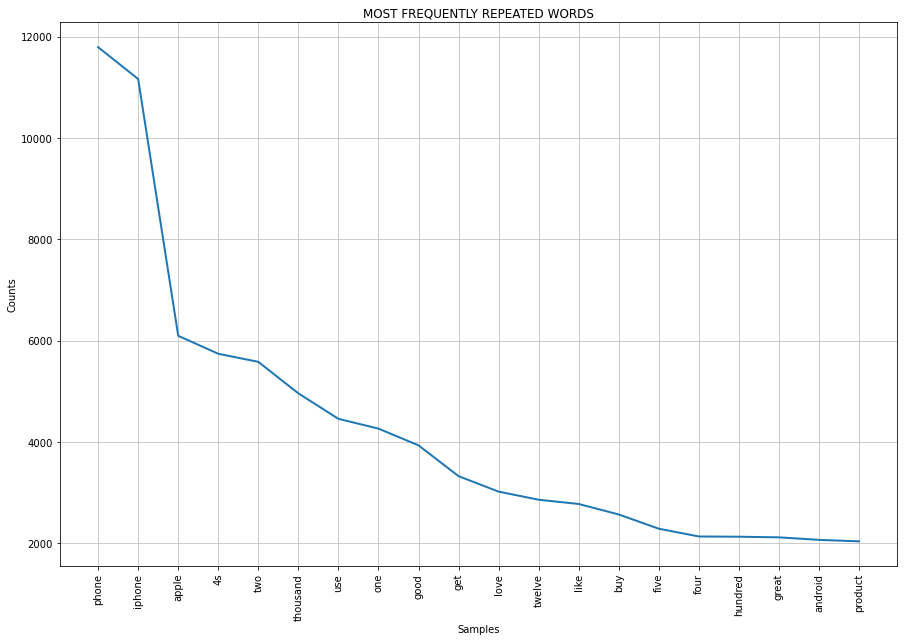

In [38]:
plt.figure(figsize=(15,10))
fdist.plot(20,cumulative=False,title='MOST FREQUENTLY REPEATED WORDS')
plt.show()

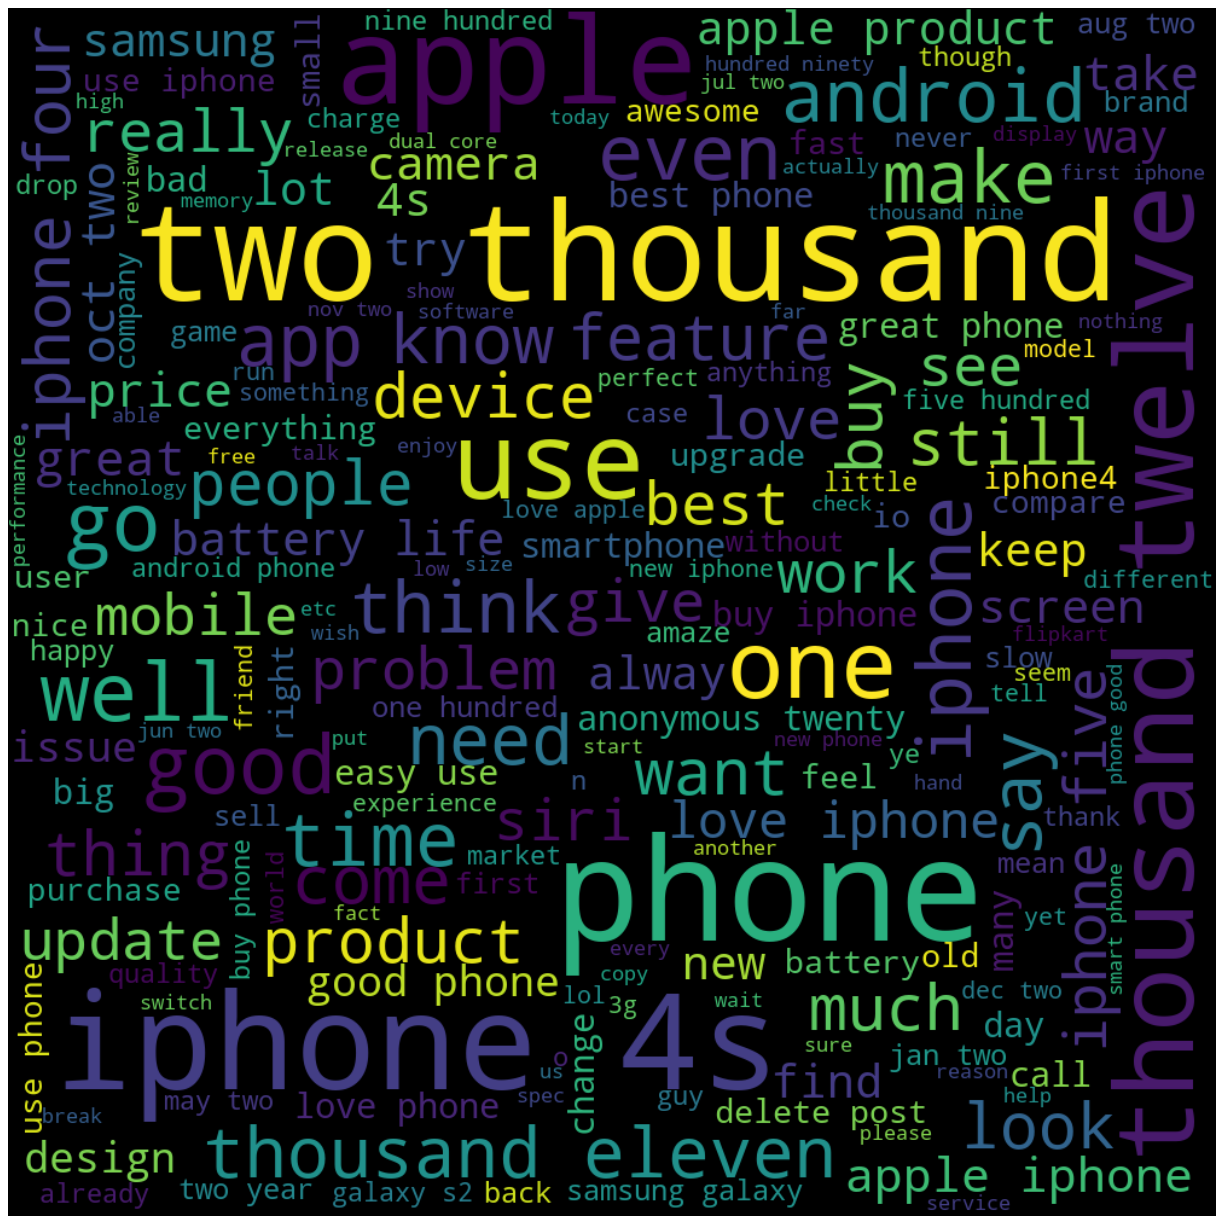

In [39]:
from wordcloud import WordCloud
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(complete_review_string)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

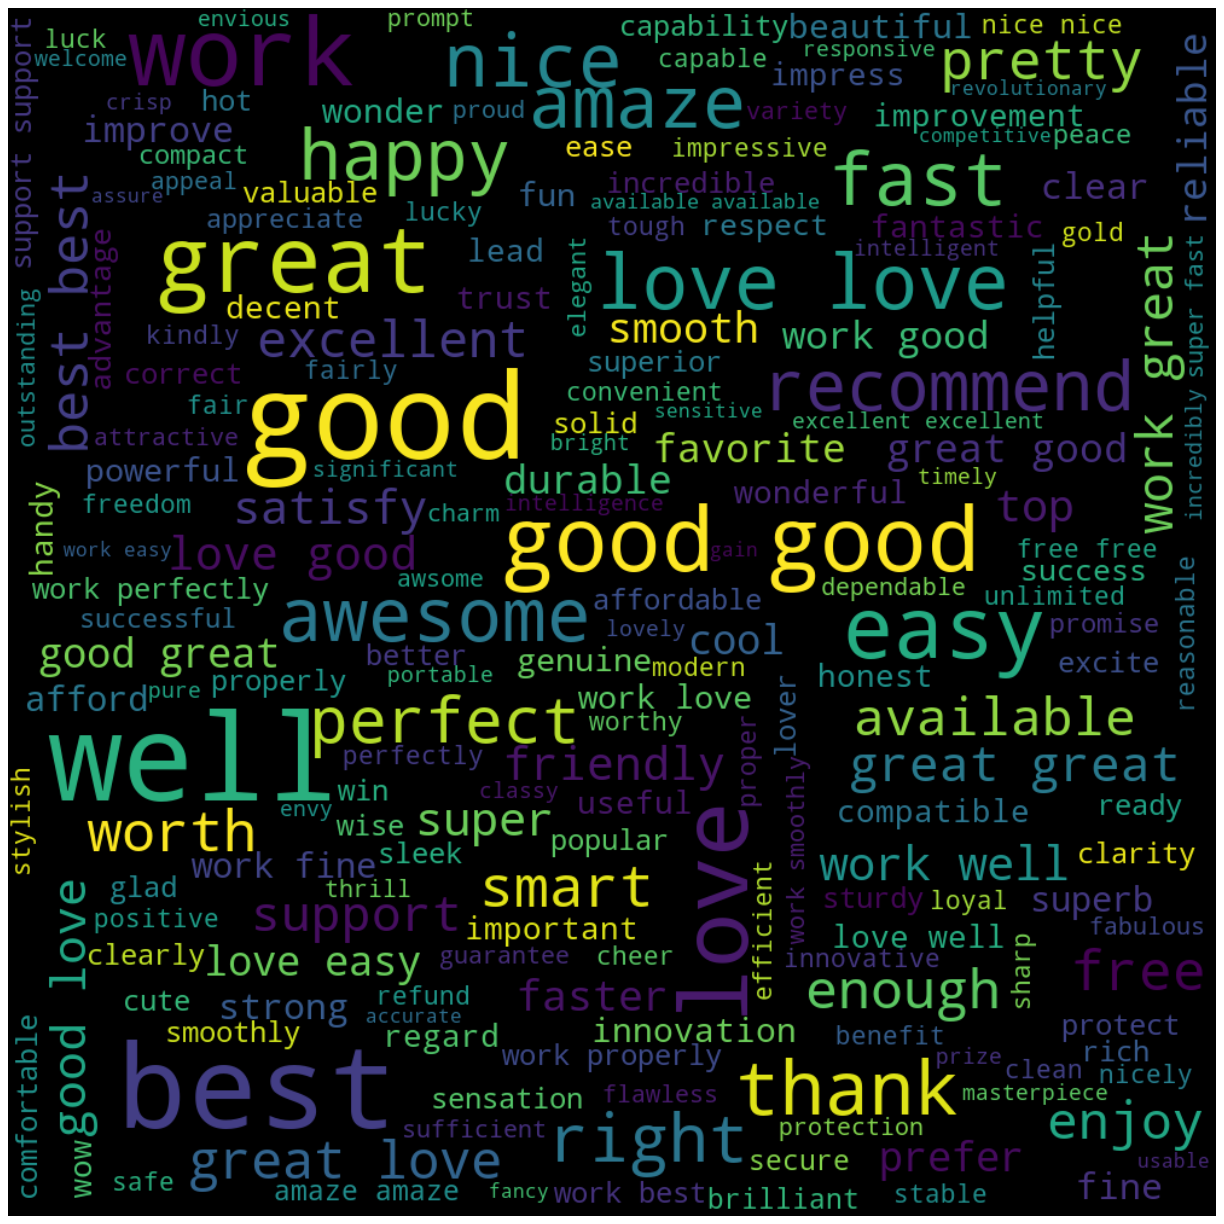

In [40]:
## positive words 
with open("positive-words (1).txt","r") as pos:
    poswords = pos.read().split("\n")  

review_pos = " ".join ([w for w in words if w in poswords])

wordCloudPos = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 100).generate(review_pos)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudPos, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [41]:
pos_words = nltk.word_tokenize(review_pos)
fdistPos = FreqDist(pos_words)
fdistPos.most_common(50)

[('good', 3936),
 ('love', 3023),
 ('like', 2779),
 ('great', 2121),
 ('best', 1960),
 ('work', 1864),
 ('well', 1788),
 ('easy', 882),
 ('nice', 616),
 ('amaze', 606),
 ('fast', 577),
 ('thank', 559),
 ('awesome', 537),
 ('happy', 483),
 ('recommend', 470),
 ('right', 444),
 ('perfect', 404),
 ('free', 351),
 ('support', 351),
 ('smart', 330),
 ('worth', 322),
 ('pretty', 305),
 ('available', 297),
 ('enough', 288),
 ('excellent', 284),
 ('enjoy', 257),
 ('fine', 241),
 ('super', 234),
 ('satisfy', 211),
 ('faster', 203),
 ('friendly', 202),
 ('top', 196),
 ('cool', 190),
 ('smooth', 180),
 ('prefer', 175),
 ('durable', 157),
 ('reliable', 155),
 ('favorite', 152),
 ('clear', 131),
 ('improve', 123),
 ('strong', 118),
 ('afford', 113),
 ('superb', 110),
 ('wonder', 106),
 ('innovation', 106),
 ('beautiful', 105),
 ('powerful', 101),
 ('perfectly', 101),
 ('genuine', 100),
 ('properly', 96)]

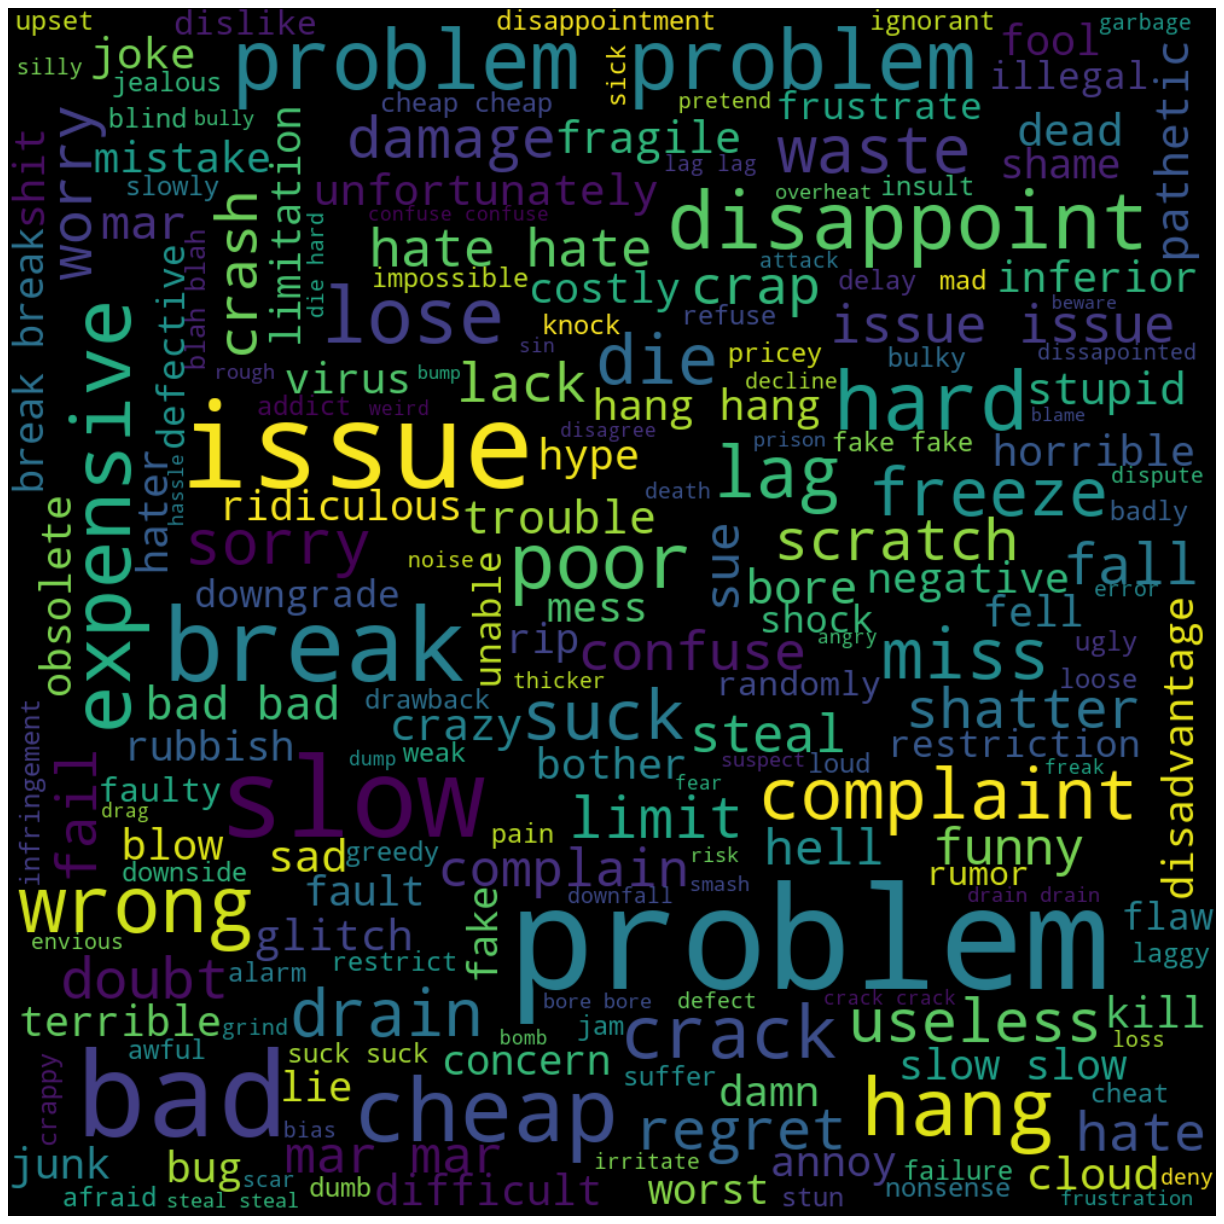

In [42]:
##Negative Words
with open("negative-words (2).txt","r") as pos:
    negwords = pos.read().split("\n")  

review_neg = " ".join ([w for w in words if w in negwords])

wordCloudNeg = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(review_neg)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudNeg, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [43]:
neg_words = nltk.word_tokenize(review_neg)
fdistNeg = FreqDist(neg_words)
fdistNeg.most_common(50)

[('problem', 1172),
 ('issue', 631),
 ('bad', 586),
 ('slow', 512),
 ('break', 414),
 ('cheap', 301),
 ('hang', 287),
 ('hate', 247),
 ('mar', 221),
 ('hard', 219),
 ('expensive', 210),
 ('disappoint', 196),
 ('lag', 194),
 ('crack', 191),
 ('wrong', 190),
 ('poor', 186),
 ('lose', 184),
 ('suck', 182),
 ('drain', 160),
 ('die', 159),
 ('miss', 146),
 ('complaint', 140),
 ('freeze', 132),
 ('waste', 127),
 ('limit', 125),
 ('sorry', 119),
 ('confuse', 115),
 ('steal', 113),
 ('useless', 112),
 ('regret', 106),
 ('worry', 103),
 ('scratch', 102),
 ('fall', 102),
 ('damage', 99),
 ('bore', 99),
 ('crash', 95),
 ('doubt', 94),
 ('fail', 90),
 ('shatter', 89),
 ('sue', 89),
 ('lack', 86),
 ('fake', 85),
 ('crap', 84),
 ('complain', 77),
 ('stupid', 77),
 ('obsolete', 76),
 ('bug', 74),
 ('funny', 74),
 ('hell', 72),
 ('pathetic', 69)]

In [44]:
len(pos_words)

36753

In [45]:
len(neg_words)

16137

## Performing Sentimental Analysis by using Vader Sentiment Analyzer

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [47]:
iphone_Data.head()

,reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v...",today instal io iphone 4s 8gb ios8 nothing f...
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli...",hello friend flipkart delivery data sad new ...
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)...",always want buy iphone 4s great look glass b...
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,...",feature lot experience nn smooth user interf...
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)...",get faulty product bad show ten five month w...


In [48]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
sent_analyser = SentimentIntensityAnalyzer()
iphone_Data["sentiments"] = iphone_Data["cleaned_reviews"].apply(lambda x: sent_analyser.polarity_scores(x))
iphone_Data = pd.concat([iphone_Data.drop(['sentiments'], axis=1), iphone_Data['sentiments'].apply(pd.Series)], axis=1)
iphone_Data   # adding the sentimental analysis

,reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v...",today instal io iphone 4s 8gb ios8 nothing f...,0.170,0.664,0.167,0.1734
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli...",hello friend flipkart delivery data sad new ...,0.087,0.758,0.154,0.3400
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)...",always want buy iphone 4s great look glass b...,0.067,0.659,0.274,0.9929
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,...",feature lot experience nn smooth user interf...,0.052,0.717,0.232,0.9983
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)...",get faulty product bad show ten five month w...,0.306,0.581,0.112,-0.6136
...,...,...,...,...,...,...,...,...,...
17355,Is it really meaningful to buy 4s now. \n \n ...,really meaningful buy 4s coz hard earn money c...,"[really, meaningful, buy, 4s, coz, hard, earn,...","[(really, r), (meaningful, a), (buy, v), (4s, ...",really meaningful buy 4s coz hard earn money...,0.163,0.446,0.391,0.5563
17356,"how to start using intrnet on i phone 4, its s...",start use intrnet phone four say mannual set r...,"[start, use, intrnet, phone, four, say, mannua...","[(start, n), (use, n), (intrnet, n), (phone, n...",start use intrnet phone four say mannual set...,0.000,1.000,0.000,0.0000
17357,It is a very good fone.i just love it,good fone love,"[good, fone, love]","[(good, a), (fone, n), (love, n)]",good fone love,0.000,0.123,0.877,0.7964
17358,"chooga, 20 Jan 2013\nI cannot open my applicat...",chooga twenty jan two thousand thirteen open a...,"[chooga, twenty, jan, two, thousand, thirteen,...","[(chooga, n), (twenty, None), (jan, n), (two, ...",chooga twenty jan two thousand thirteen open...,0.000,0.817,0.183,0.5719


In [50]:
iphone_Data['scores'] = iphone_Data['cleaned_reviews'].apply(lambda x: sent_analyser.polarity_scores(str(x)))
iphone_Data.head(20)

,reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v...",today instal io iphone 4s 8gb ios8 nothing f...,0.170,0.664,0.167,0.1734,"{'neg': 0.17, 'neu': 0.664, 'pos': 0.167, 'com..."
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli...",hello friend flipkart delivery data sad new ...,0.087,0.758,0.154,0.3400,"{'neg': 0.087, 'neu': 0.758, 'pos': 0.154, 'co..."
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)...",always want buy iphone 4s great look glass b...,0.067,0.659,0.274,0.9929,"{'neg': 0.067, 'neu': 0.659, 'pos': 0.274, 'co..."
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,...",feature lot experience nn smooth user interf...,0.052,0.717,0.232,0.9983,"{'neg': 0.052, 'neu': 0.717, 'pos': 0.232, 'co..."
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)...",get faulty product bad show ten five month w...,0.306,0.581,0.112,-0.6136,"{'neg': 0.306, 'neu': 0.581, 'pos': 0.112, 'co..."
5,"within 15days , charger is not working, as per...",within 15days charger work per flipkart custom...,"[within, 15days, charger, work, per, flipkart,...","[(within, None), (15days, None), (charger, n),...",within 15days charger work per flipkart cust...,0.146,0.667,0.187,0.3182,"{'neg': 0.146, 'neu': 0.667, 'pos': 0.187, 'co..."
6,"After years of torture using Android, symbian ...",years torture use android symbian windows phon...,"[years, torture, use, android, symbian, window...","[(years, n), (torture, n), (use, n), (android,...",year torture use android symbian windows pho...,0.159,0.743,0.098,-0.7184,"{'neg': 0.159, 'neu': 0.743, 'pos': 0.098, 'co..."
7,FOR THOSE WHO ARE COMPLAINING.nn1.Never compar...,complain nn1 never compare ghz core ram androi...,"[complain, nn1, never, compare, ghz, core, ram...","[(complain, n), (nn1, a), (never, r), (compare...",complain nn1 never compare ghz core ram andr...,0.024,0.908,0.068,0.5423,"{'neg': 0.024, 'neu': 0.908, 'pos': 0.068, 'co..."
8,guys trust me don't buy any of the product fro...,guy trust buy product flipkart one ten product...,"[guy, trust, buy, product, flipkart, one, ten,...","[(guy, n), (trust, n), (buy, v), (product, n),...",guy trust buy product flipkart one ten produ...,0.188,0.724,0.088,-0.5719,"{'neg': 0.188, 'neu': 0.724, 'pos': 0.088, 'co..."
9,This is my first iphone and I am using it for ...,first iphone use past ten days quiet happy npr...,"[first, iphone, use, past, ten, days, quiet, h...","[(first, r), (iphone, n), (use, n), (past, a),...",first iphone use past ten day quiet happy np...,0.025,0.605,0.370,0.9826,"{'neg': 0.025, 'neu': 0.605, 'pos': 0.37, 'com..."


In [51]:
iphone_Data['compound'] = iphone_Data['scores'].apply(lambda score_dict: score_dict['compound'])
iphone_Data['sentiment_type']=''
iphone_Data.loc[iphone_Data.compound>0,'sentiment_type']='POSITIVE'
iphone_Data.loc[iphone_Data.compound==0,'sentiment_type']='NEUTRAL'
iphone_Data.loc[iphone_Data.compound<0,'sentiment_type']='NEGATIVE'
iphone_Data

,reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores,sentiment_type
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v...",today instal io iphone 4s 8gb ios8 nothing f...,0.170,0.664,0.167,0.1734,"{'neg': 0.17, 'neu': 0.664, 'pos': 0.167, 'com...",POSITIVE
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli...",hello friend flipkart delivery data sad new ...,0.087,0.758,0.154,0.3400,"{'neg': 0.087, 'neu': 0.758, 'pos': 0.154, 'co...",POSITIVE
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)...",always want buy iphone 4s great look glass b...,0.067,0.659,0.274,0.9929,"{'neg': 0.067, 'neu': 0.659, 'pos': 0.274, 'co...",POSITIVE
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,...",feature lot experience nn smooth user interf...,0.052,0.717,0.232,0.9983,"{'neg': 0.052, 'neu': 0.717, 'pos': 0.232, 'co...",POSITIVE
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)...",get faulty product bad show ten five month w...,0.306,0.581,0.112,-0.6136,"{'neg': 0.306, 'neu': 0.581, 'pos': 0.112, 'co...",NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...
17355,Is it really meaningful to buy 4s now. \n \n ...,really meaningful buy 4s coz hard earn money c...,"[really, meaningful, buy, 4s, coz, hard, earn,...","[(really, r), (meaningful, a), (buy, v), (4s, ...",really meaningful buy 4s coz hard earn money...,0.163,0.446,0.391,0.5563,"{'neg': 0.163, 'neu': 0.446, 'pos': 0.391, 'co...",POSITIVE
17356,"how to start using intrnet on i phone 4, its s...",start use intrnet phone four say mannual set r...,"[start, use, intrnet, phone, four, say, mannua...","[(start, n), (use, n), (intrnet, n), (phone, n...",start use intrnet phone four say mannual set...,0.000,1.000,0.000,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL
17357,It is a very good fone.i just love it,good fone love,"[good, fone, love]","[(good, a), (fone, n), (love, n)]",good fone love,0.000,0.123,0.877,0.7964,"{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...",POSITIVE
17358,"chooga, 20 Jan 2013\nI cannot open my applicat...",chooga twenty jan two thousand thirteen open a...,"[chooga, twenty, jan, two, thousand, thirteen,...","[(chooga, n), (twenty, None), (jan, n), (two, ...",chooga twenty jan two thousand thirteen open...,0.000,0.817,0.183,0.5719,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",POSITIVE


In [52]:
iphone_Data['sentiment_type'].value_counts()

POSITIVE    12631
NEGATIVE     2485
NEUTRAL      2236
Name: sentiment_type, dtype: int64

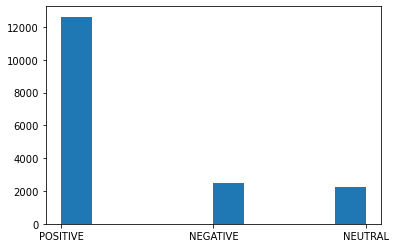

In [53]:
plt.hist(iphone_Data['sentiment_type'])
plt.show()

In [54]:
iphone_Data.shape

(17352, 11)

In [55]:
# separating Dependent and independent features 
x= iphone_Data.iloc[:,0:10]    # Independent

In [56]:
x.head()

,reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v...",today instal io iphone 4s 8gb ios8 nothing f...,0.170,0.664,0.167,0.1734,"{'neg': 0.17, 'neu': 0.664, 'pos': 0.167, 'com..."
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli...",hello friend flipkart delivery data sad new ...,0.087,0.758,0.154,0.3400,"{'neg': 0.087, 'neu': 0.758, 'pos': 0.154, 'co..."
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)...",always want buy iphone 4s great look glass b...,0.067,0.659,0.274,0.9929,"{'neg': 0.067, 'neu': 0.659, 'pos': 0.274, 'co..."
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,...",feature lot experience nn smooth user interf...,0.052,0.717,0.232,0.9983,"{'neg': 0.052, 'neu': 0.717, 'pos': 0.232, 'co..."
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)...",get faulty product bad show ten five month w...,0.306,0.581,0.112,-0.6136,"{'neg': 0.306, 'neu': 0.581, 'pos': 0.112, 'co..."


In [57]:
y = iphone_Data.iloc[:,-1:]

In [58]:
y.head()

,sentiment_type
0,POSITIVE
1,POSITIVE
2,POSITIVE
3,POSITIVE
4,NEGATIVE


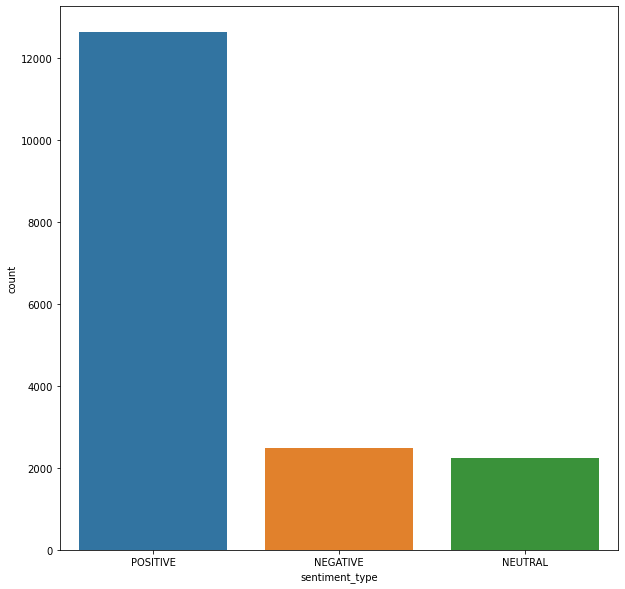

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x=y['sentiment_type'])
plt.rcParams["figure.autolayout"] = True

plt.show()

In [60]:
iphone_Data.head()

,reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores,sentiment_type
0,Today i installed IOS on my iphone 4s 8GB.The ...,today instal ios iphone 4s 8gb ios8 nothing fa...,"[today, instal, ios, iphone, 4s, 8gb, ios8, no...","[(today, n), (instal, a), (ios, n), (iphone, v...",today instal io iphone 4s 8gb ios8 nothing f...,0.170,0.664,0.167,0.1734,"{'neg': 0.17, 'neu': 0.664, 'pos': 0.167, 'com...",POSITIVE
1,hello friend ..flipkart delivery is on data bu...,hello friend flipkart delivery data sad new bo...,"[hello, friend, flipkart, delivery, data, sad,...","[(hello, n), (friend, v), (flipkart, a), (deli...",hello friend flipkart delivery data sad new ...,0.087,0.758,0.154,0.3400,"{'neg': 0.087, 'neu': 0.758, 'pos': 0.154, 'co...",POSITIVE
2,Always wanted to buy iphone 4s; because of its...,always want buy iphone 4s great look glass bac...,"[always, want, buy, iphone, 4s, great, look, g...","[(always, r), (want, v), (buy, v), (iphone, a)...",always want buy iphone 4s great look glass b...,0.067,0.659,0.274,0.9929,"{'neg': 0.067, 'neu': 0.659, 'pos': 0.274, 'co...",POSITIVE
3,'Some' Features ( There is a lot more which yo...,feature lot experience nn smoothest user inter...,"[feature, lot, experience, nn, smoothest, user...","[(feature, n), (lot, n), (experience, n), (nn,...",feature lot experience nn smooth user interf...,0.052,0.717,0.232,0.9983,"{'neg': 0.052, 'neu': 0.717, 'pos': 0.232, 'co...",POSITIVE
4,i got faulty product.. very bad .. showing 10....,get faulty product bad show ten five months wa...,"[get, faulty, product, bad, show, ten, five, m...","[(get, v), (faulty, a), (product, n), (bad, a)...",get faulty product bad show ten five month w...,0.306,0.581,0.112,-0.6136,"{'neg': 0.306, 'neu': 0.581, 'pos': 0.112, 'co...",NEGATIVE


# VECTORIZATION

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(iphone_Data['cleaned_reviews'],iphone_Data['sentiment_type'],test_size=0.20,shuffle=True)

In [63]:
x_train.shape,y_train.shape

((13881,), (13881,))

In [64]:
x_train.head()

6951     get phone first come perfect get bite older ba...
2555     one best iphones ashamed zero issue device smo...
2850     hate phone become outdated slow charge never l...
4464     great phone last two years drop phone blazer p...
13759                    phone work tmibile usa 4g network
Name: cleaned_reviews, dtype: object

In [65]:
x_test.shape,y_test.shape

((3471,), (3471,))

In [66]:
y_train.head()

6951     POSITIVE
2555     POSITIVE
2850     NEGATIVE
4464     POSITIVE
13759     NEUTRAL
Name: sentiment_type, dtype: object

In [67]:
type(x_test)

pandas.core.series.Series

In [68]:
type(y_test)

pandas.core.series.Series

# TF -IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tf_x_train = tfidf_vectorizer.fit_transform(x_train)
tf_x_test = tfidf_vectorizer.transform(x_test)

In [70]:
print(tf_x_train)

  (0, 13240)	0.2898727568648283
  (0, 14301)	0.22853014278320305
  (0, 11250)	0.3848562964290754
  (0, 12566)	0.27470640506840094
  (0, 13126)	0.32247274657392466
  (0, 1936)	0.20002301470215764
  (0, 9802)	0.34035992757630323
  (0, 2176)	0.2906010579780184
  (0, 10281)	0.2787301360447244
  (0, 3066)	0.21918931796133717
  (0, 5407)	0.2228790409911324
  (0, 10391)	0.10732274458956195
  (0, 5881)	0.3300762981826687
  (1, 12458)	0.17131923319176895
  (1, 6861)	0.22797588078122252
  (1, 3502)	0.21847049139730812
  (1, 2515)	0.11826370635703544
  (1, 13501)	0.17713414235344765
  (1, 5863)	0.31548379285981437
  (1, 5993)	0.11040879732842454
  (1, 2593)	0.2706592615954097
  (1, 5585)	0.11900218392993264
  (1, 7243)	0.07232158628260346
  (1, 11453)	0.2162727041044012
  (1, 5123)	0.23844342561900844
  :	:
  (13877, 13696)	0.12428047592159978
  (13877, 3085)	0.19127469530750826
  (13877, 14048)	0.10177785455145853
  (13877, 13685)	0.087992791994527
  (13877, 1324)	0.12199534755798493
  (13877, 1

In [71]:
Data_models = pd.DataFrame(columns = ['Model','Train_Accuracy','Test_Accuracy'])

# MODEL BUILDING 

## 1.LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

In [73]:
logistic_model = LogisticRegression(max_iter=1000,solver='saga')
logistic_model.fit(tf_x_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [74]:
# PERFORMING MODEL TESTING AND MODEL EVALUATION

#training dataset
y_pred_train=logistic_model.predict(tf_x_train)
y_pred_train

array(['POSITIVE', 'POSITIVE', 'NEGATIVE', ..., 'POSITIVE', 'POSITIVE',
       'NEGATIVE'], dtype=object)

In [75]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_train,y_pred_train))
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy : 0.9313450039622505
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.70      0.81      1960
     NEUTRAL       0.94      0.83      0.88      1814
    POSITIVE       0.93      0.99      0.96     10107

    accuracy                           0.93     13881
   macro avg       0.94      0.84      0.88     13881
weighted avg       0.93      0.93      0.93     13881

Confusion Matrix:
 [[ 1375    72   513]
 [   25  1500   289]
 [   33    21 10053]]


In [76]:
#test data
y_pred_test=logistic_model.predict(tf_x_test)
y_pred_test

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_test,y_pred_test))
print('Classification Report:\n',classification_report(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Accuracy : 0.8594065110919044
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.87      0.47      0.61       525
     NEUTRAL       0.80      0.63      0.71       422
    POSITIVE       0.87      0.98      0.92      2524

    accuracy                           0.86      3471
   macro avg       0.85      0.69      0.74      3471
weighted avg       0.86      0.86      0.85      3471

Confusion Matrix:
 [[ 245   39  241]
 [  11  267  144]
 [  25   28 2471]]


In [78]:
logistic_model_train =accuracy_score(y_train,y_pred_train)
logistic_model_test=accuracy_score(y_test,y_pred_test)

Data_models.loc[1,'Model'] = 'Logistic Regression'
Data_models.loc[1,"Train_Accuracy"] = logistic_model_train
Data_models.loc[1,"Test_Accuracy"] = logistic_model_test

## 2. SVM

In [79]:
from sklearn.svm import LinearSVC
svm_data= LinearSVC(random_state=123)
svm_model=svm_data.fit(tf_x_train,y_train)
svm_model

LinearSVC(random_state=123)

In [80]:
svm_pred_train_y = svm_model.predict(tf_x_train)
svm_pred_train_y

array(['POSITIVE', 'POSITIVE', 'NEGATIVE', ..., 'POSITIVE', 'POSITIVE',
       'NEGATIVE'], dtype=object)

In [81]:
svm_pred_test_y = svm_model.predict(tf_x_test)
svm_pred_test_y

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'NEUTRAL',
       'POSITIVE'], dtype=object)

In [82]:
print("Training Accuracy :",accuracy_score(y_train,svm_pred_train_y))
print("Testing Accuracy : ",accuracy_score(y_test, svm_pred_test_y))

Training Accuracy : 0.9884734529212593
Testing Accuracy :  0.8965715932008067


In [83]:
svm_train =accuracy_score(y_train,svm_pred_train_y)
svm_test=accuracy_score(y_test,svm_pred_test_y)


Data_models.loc[2,'Model'] = 'SVM'
Data_models.loc[2,"Train_Accuracy"] = svm_train
Data_models.loc[2,"Test_Accuracy"] = svm_test

##  3. NAIVE BAYES

In [84]:
naive_bayes=MultinomialNB()
naive_bayes_classifier=naive_bayes.fit(tf_x_train, y_train)
naive_bayes_classifier

MultinomialNB()

In [85]:
y_pred_train_nbc=naive_bayes_classifier.predict(tf_x_train)
y_pred_train_nbc

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype='<U8')

In [86]:
y_pred_test_nbc=naive_bayes_classifier.predict(tf_x_test)
y_pred_test_nbc

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype='<U8')

In [87]:
print("Training Accuracy :",accuracy_score(y_train,y_pred_train_nbc))
print("Testing Accuracy : ",accuracy_score(y_test, y_pred_test_nbc))

Training Accuracy : 0.7392839132627332
Testing Accuracy :  0.728320368769807


In [88]:
nbc_train =accuracy_score(y_train,y_pred_train_nbc)
nbc_test=accuracy_score(y_test, y_pred_test_nbc)

Data_models.loc[3,'Model'] = 'NAIVE BAYES'
Data_models.loc[3,"Train_Accuracy"] = nbc_train
Data_models.loc[3,"Test_Accuracy"] = nbc_test

## 4.KNN

In [89]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_classifier=knn.fit(tf_x_train,y_train)

In [90]:
y_pred_train_knn  =  knn_classifier.predict(tf_x_train)
y_pred_train_knn

array(['NEUTRAL', 'POSITIVE', 'NEUTRAL', ..., 'POSITIVE', 'POSITIVE',
       'NEGATIVE'], dtype=object)

In [91]:
y_pred_test_knn  =  knn_classifier.predict(tf_x_test)
y_pred_test_knn

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [92]:
print("Training Accuracy :",accuracy_score(y_train,y_pred_train_knn))
print("Testing Accuracy : ",accuracy_score(y_test, y_pred_test_knn))

Training Accuracy : 0.7762409048339457
Testing Accuracy :  0.6488043791414578


In [93]:
knn_train =accuracy_score(y_train,y_pred_train_knn)
knn_test=accuracy_score(y_test, y_pred_test_knn)

Data_models.loc[4,'Model']          = 'KNN'
Data_models.loc[4,"Train_Accuracy"] = knn_train
Data_models.loc[4,"Test_Accuracy"]  = knn_test

## 5. DECISION TREE  

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 123,ccp_alpha=0.0010 )
dt_classifier_gini.fit(tf_x_train, y_train)
DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

In [95]:
## USING ENTROPY PERFORMIG MODEL TRAINING 

y_pred_train_gini=dt_classifier_gini.predict(tf_x_train)
y_pred_train_gini

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'NEGATIVE'], dtype=object)

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_train,y_pred_train_gini))
print("classification_report:",classification_report(y_train,y_pred_train_gini))
print("confusion_matrix:",confusion_matrix(y_train,y_pred_train_gini))

Accuracy : 0.7924501116634248
classification_report:               precision    recall  f1-score   support

    NEGATIVE       0.78      0.19      0.31      1960
     NEUTRAL       0.58      0.61      0.59      1814
    POSITIVE       0.83      0.94      0.88     10107

    accuracy                           0.79     13881
   macro avg       0.73      0.58      0.59     13881
weighted avg       0.79      0.79      0.76     13881

confusion_matrix: [[ 377  304 1279]
 [   7 1101  706]
 [  97  488 9522]]


In [97]:
#TEST DATA
y_pred_test_gini=dt_classifier_gini.predict(tf_x_test)
y_pred_test_gini

array(['POSITIVE', 'NEUTRAL', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [98]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred_test_gini))
print("classification_report:",classification_report(y_test,y_pred_test_gini))
print("confusion_matrix:",confusion_matrix(y_test,y_pred_test_gini))

Accuracy: 0.773552290406223
classification_report:               precision    recall  f1-score   support

    NEGATIVE       0.75      0.17      0.27       525
     NEUTRAL       0.52      0.59      0.55       422
    POSITIVE       0.82      0.93      0.87      2524

    accuracy                           0.77      3471
   macro avg       0.69      0.56      0.56      3471
weighted avg       0.77      0.77      0.74      3471

confusion_matrix: [[  88   87  350]
 [   1  249  172]
 [  29  147 2348]]


In [99]:
decision_tree_model_train =accuracy_score(y_train,y_pred_train_gini)
decision_tree_model_test=accuracy_score(y_test,y_pred_test_gini)

Data_models.loc[5,'Model'] = 'Decision Tree (Gini)'
Data_models.loc[5,"Train_Accuracy"] = decision_tree_model_train
Data_models.loc[5,"Test_Accuracy"] = decision_tree_model_test

In [100]:
def get_percentage(num):
    return "{:.2f}".format(num*100)

In [101]:
Data_models["Train_Accuracy"] = Data_models["Train_Accuracy"].apply(get_percentage)
Data_models["Test_Accuracy"]  = Data_models["Test_Accuracy"].apply(get_percentage)
Data_models

,Model,Train_Accuracy,Test_Accuracy
1,Logistic Regression,93.13,85.94
2,SVM,98.85,89.66
3,NAIVE BAYES,73.93,72.83
4,KNN,77.62,64.88
5,Decision Tree (Gini),79.25,77.36


In [128]:
data=iphone_Data[['reviews','compound','sentiment_type']]
data=data.sort_values('compound',ascending=False)

In [129]:
top_two_reviews=data.head(2)
top_two_reviews

,reviews,compound,sentiment_type
3,'Some' Features ( There is a lot more which yo...,0.9983,POSITIVE
14320,"AnonD-54901, 15 May 2012What's Better B/W Noki...",0.9975,POSITIVE


In [130]:
bottom_two_reviews=data.tail(2)
bottom_two_reviews

,reviews,compound,sentiment_type
7504,This phone is very very very bad phone bad pro...,-0.9925,NEGATIVE
3481,I Hate It I Hate ItI Hate ItI Hate ItI Hate It...,-0.9997,NEGATIVE


In [132]:
top_2_and_bottom_2_reviews=top_two_reviews.append(bottom_two_reviews)
top_2_and_bottom_2_reviews

,reviews,compound,sentiment_type
3,'Some' Features ( There is a lot more which yo...,0.9983,POSITIVE
14320,"AnonD-54901, 15 May 2012What's Better B/W Noki...",0.9975,POSITIVE
7504,This phone is very very very bad phone bad pro...,-0.9925,NEGATIVE
3481,I Hate It I Hate ItI Hate ItI Hate ItI Hate It...,-0.9997,NEGATIVE


In [145]:
top_2_and_bottom_2_reviews.to_csv("E:\\top_2_bottom_2_reviews.csv")

In [103]:
new_data = ['I got it before the estimated date',
           'I am regular customer on Amazon',
           'good phone but battery life very poor',
           'Product and delivery is good',
           'Nice phone, back in the days when i used it']


In [104]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRIYANKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
import re
import contractions
from nltk.corpus import stopwords

In [107]:
new_clean_data = list(map(cleantext, new_data))
new_clean_data

['get estimate date',
 'regular customer amazon',
 'good phone battery life poor',
 'product delivery good',
 'nice phone back days use']

In [108]:
new_data_tf = tfidf_vectorizer.transform(new_clean_data)
new_data_tf

<5x15253 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [109]:
svm_pred_train_y = svm_model.predict(new_data_tf)
svm_pred_train_y

array(['NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE'],
      dtype=object)

In [110]:
import pickle

In [111]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [112]:
import joblib

In [113]:
pickle_out = open("model_sentiment.pkl","wb")
pickle_out=joblib.dump(svm_model,pickle_out)
pickle_out

In [114]:
pickle_out_tfidf = open("model_sentiment_tfidf.pkl","wb")
pickle_out_tfidf=joblib.dump(tfidf_vectorizer,pickle_out_tfidf)
pickle_out_tfidf

In [115]:
reviewText = "worst phone ever dissapointed issue problems"

In [116]:
cleanReviewText = cleantext(reviewText)
cleanReviewText

'worst phone ever dissapointed issue problems'

In [117]:
textTfIDF = tfidf_vectorizer.transform([cleanReviewText])

In [118]:
predictedOutput=svm_model.predict(textTfIDF)
predictedOutput = predictedOutput[0]
predictedOutput

'NEGATIVE'

In [119]:
prdictionDist = svm_model._predict_proba_lr(textTfIDF)
prdictionDist


array([[0.68986166, 0.20261124, 0.1075271 ]])

In [120]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [121]:
from tabulate import tabulate
dfRes = pd.DataFrame(columns=['Negative', 'Positive','Neutral'])
dfRes.loc[1, 'Negative'] = get_percentage(prdictionDist[0][0])
dfRes.loc[1, 'Neutral'] = get_percentage(prdictionDist[0][1])
dfRes.loc[1, 'Positive'] = get_percentage(prdictionDist[0][2])

In [122]:
print(tabulate(dfRes, headers=dfRes.columns, tablefmt="fancy_grid", showindex="never"))

╒════════════╤════════════╤═══════════╕
│   Negative │   Positive │   Neutral │
╞════════════╪════════════╪═══════════╡
│      68.99 │      10.75 │     20.26 │
╘════════════╧════════════╧═══════════╛
